<a href="https://colab.research.google.com/github/annika-fagerstrom/DataMining-WorldHappinessReport/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Final Project - Group 1
#Project Members: David D’Onofrio, Liza Kottler, Annika Fagerstrom and Rachel Konshok
#Description: Using data mining tools to study the world happiness report date from the UN for 2018 & 2019
#Date: April - May, 2021
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from pandas import Series, DataFrame
import seaborn as sns
from sklearn import preprocessing

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC #support vector machine, a classification model
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.externals import joblib
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import SpectralClustering

#Pulling dataset in from Github repository
url = 'https://raw.githubusercontent.com/david-donofrio/Data_Mining/main/2018.csv'
df_2018 = pd.read_csv(url) # Happiness data frame for 2018
url = 'https://raw.githubusercontent.com/david-donofrio/Data_Mining/main/2019.csv'
df_2019 = pd.read_csv(url) # Happiness data frame from 2019
url = 'https://raw.githubusercontent.com/david-donofrio/Data_Mining/main/RoughPopData2019%20(3).csv'
df_pop = pd.read_csv(url) # Population data frame for 2015-2019

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def check_outliers(x): #function to identify outliers
  q25 = x.quantile(.25)
  q75 = x.quantile(.75)
  IQR = q75-q25
  l = q25 - IQR*1.5
  u = q75 + IQR*1.5
  return l, u

def replace_with_bin_mean(x): #function to find mean of bins
    if True:
        x = x.mean()
    return x


Adding Population Column and dropping repeated/duplicate columns

In [ ]:
df_2018 = pd.merge(df_2018, df_pop[['Region, subregion, country or area *','2018']], left_on='Country or region', right_on = 'Region, subregion, country or area *',how='left') #merge columns
df_2018['Population'] = df_2018['2018'] # rename column
df_2018=df_2018.drop('2018',axis=1) # remove repeated column
df_2018=df_2018.drop('Region, subregion, country or area *',axis=1) # remove repeated column

df_2019 = pd.merge(df_2019, df_pop[['Region, subregion, country or area *','2019']], left_on='Country or region', right_on = 'Region, subregion, country or area *',how='left') #merge columns
df_2019['Population'] = df_2019['2019'] # rename column
df_2019=df_2019.drop('2019',axis=1) # remove repeated column
df_2019=df_2019.drop('Region, subregion, country or area *',axis=1) # remove repeated column


In [ ]:
df_2018.head() # Confirm correct columns

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,5523.0
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,5338.0
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,5752.0
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,337.0
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,8526.0


In [ ]:
df_2019.head() # Confirm correct columns

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Population
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5532.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5772.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5379.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,339.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,17097.0


Study Attributes and Handle Outliers

In [ ]:
df_2018.info() #Get info on 2018 data
#missing values: 1 for perceptions of corruption, 22 for population

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
 9   Population                    134 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 13.4+ KB


In [ ]:
df_2018['Overall rank'].describe()
#represents rank of each country
#type: float64
#no missing values

count    156.000000
mean      78.500000
std       45.177428
min        1.000000
25%       39.750000
50%       78.500000
75%      117.250000
max      156.000000
Name: Overall rank, dtype: float64

In [ ]:
df_2018['Country or region'].describe()
#represents name of each country
#type: object
#no missing values

count        156
unique       156
top       Bhutan
freq           1
Name: Country or region, dtype: object

In [ ]:
df_2018['Score'].describe()
#represents happiness score of each country
#type: float64
#no missing values

count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Score, dtype: float64

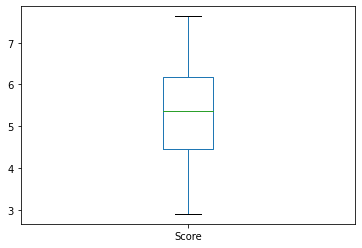

In [ ]:
df_2018['Score'].plot.box(whis=1.5)
#NO OUTLIERS

In [ ]:
df_2018['GDP per capita'].describe()
#represents GDP per capita of each country
#type: float64
#no missing values

count    156.000000
mean       0.891449
std        0.391921
min        0.000000
25%        0.616250
50%        0.949500
75%        1.197750
max        2.096000
Name: GDP per capita, dtype: float64

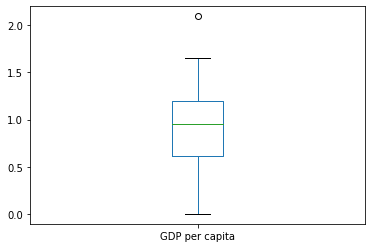

In [ ]:
df_2018['GDP per capita'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower1, upper1 = check_outliers(df_2018['GDP per capita'])
print(f'lower = {lower1}, upper={upper1}')

lower = -0.2560000000000002, upper=2.0700000000000003


In [ ]:
mask_upper1 = df_2018['GDP per capita']>upper1
print(f'{mask_upper1.sum()} Upper outliers')
#upper outliers


1 Upper outliers


In [ ]:
mask_lower1 = df_2018['GDP per capita']<lower1
print(f'{mask_lower1.sum()} Lower outliers')
#lower outliers

0 Lower outliers


In [ ]:
#replace outliers

df_2018['GDP per capita']=df_2018['GDP per capita']
for i in df_2018[mask_upper1].index:
  df_2018.loc[i,'GDP per capita']=upper1
for i in df_2018[mask_lower1].index:
  df_2018.loc[i,'GDP per capita']=lower1

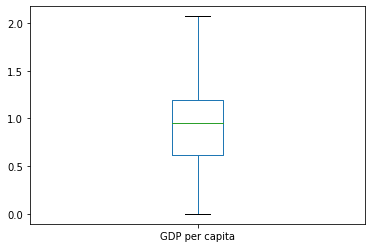

In [ ]:
df_2018['GDP per capita'].plot.box(whis=1.5)
# No outliers

In [ ]:
df_2018['Social support'].describe()
#represents ....
#type: float64
#no missing values

count    156.000000
mean       1.213237
std        0.302372
min        0.000000
25%        1.066750
50%        1.255000
75%        1.463000
max        1.644000
Name: Social support, dtype: float64

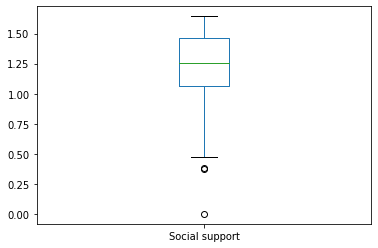

In [ ]:
df_2018['Social support'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower2, upper2 = check_outliers(df_2018['Social support'])
print(f'lower = {lower2}, upper={upper2}')

lower = 0.47237499999999955, upper=2.0573750000000004


In [ ]:
mask_upper2 = df_2018['Social support']>upper2
mask_upper2.sum()
#no upper outliers 

0

In [ ]:
mask_lower2 = df_2018['Social support']<lower2
mask_lower2.sum()
#lower outliers 

3

In [ ]:
df_2018['Social support']=df_2018['Social support']
for i in df_2018[mask_lower2].index: 
  df_2018.loc[i,'Social support']=lower2 # replace lower outliers

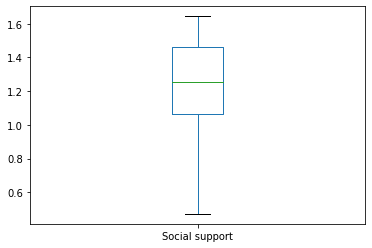

In [ ]:
df_2018['Social support'].plot.box(whis=1.5)
# No outliers

In [ ]:
df_2018['Healthy life expectancy'].describe()
#represents ....
#type: float64
#no missing values

count    156.000000
mean       0.597346
std        0.247579
min        0.000000
25%        0.422250
50%        0.644000
75%        0.777250
max        1.030000
Name: Healthy life expectancy, dtype: float64

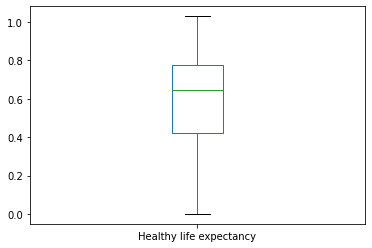

In [ ]:
df_2018['Healthy life expectancy'].plot.box(whis=1.5)
#NO OUTLIERS

In [ ]:
df_2018['Agency'] = df_2018['Freedom to make life choices'] #renaming column
df_2018 = df_2018.drop(labels=['Freedom to make life choices'], axis=1) # drop duplicate 
df_2018['Agency'].describe()
#represents ....
#type: float64
#no missing values

count    156.000000
mean       0.454506
std        0.162424
min        0.000000
25%        0.356000
50%        0.487000
75%        0.578500
max        0.724000
Name: Agency, dtype: float64

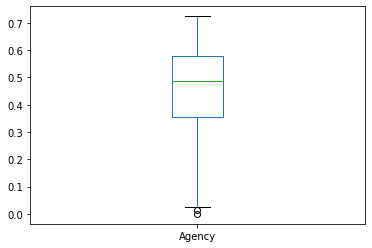

In [ ]:
df_2018['Agency'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower3, upper3 = check_outliers(df_2018['Agency'])
print(f'lower = {lower3}, upper={upper3}')

lower = 0.022250000000000048, upper=0.91225


In [ ]:
mask_upper3 = df_2018['Agency']>upper3
mask_upper3.sum()
#no upper outliers

0

In [ ]:
mask_lower3 = df_2018['Agency']<lower3
mask_lower3.sum()
#lower outliers

2

In [ ]:
df_2018['Agency']=df_2018['Agency']
for i in df_2018[mask_lower3].index:
  df_2018.loc[i,'Agency']=lower3 # replace lower outliers

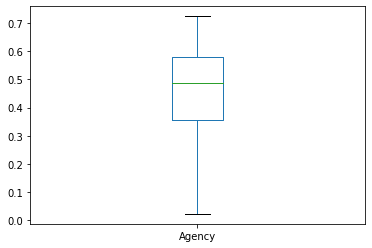

In [ ]:
df_2018['Agency'].plot.box(whis=1.5)
#outliers removed

In [ ]:
df_2018['Generosity'].describe()
#represents ....
#type: float64
#no missing values

count    156.000000
mean       0.181006
std        0.098471
min        0.000000
25%        0.109500
50%        0.174000
75%        0.239000
max        0.598000
Name: Generosity, dtype: float64

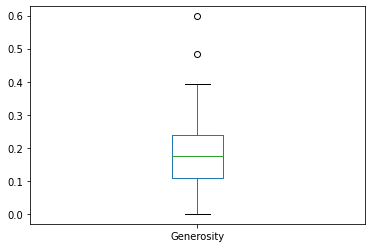

In [ ]:
df_2018['Generosity'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower4, upper4 = check_outliers(df_2018['Generosity'])
print(f'lower = {lower4}, upper={upper4}')

lower = -0.08474999999999999, upper=0.43325


In [ ]:
mask_upper4 = df_2018['Generosity']>upper4
mask_upper4.sum()
#upper outliers

2

In [ ]:
mask_lower4 = df_2018['Generosity']<lower4
mask_lower4.sum()
#no lower outliers

0

In [ ]:
df_2018['Generosity']=df_2018['Generosity']
for i in df_2018[mask_upper4].index:
  df_2018.loc[i,'Generosity']=upper4 # replace outliers

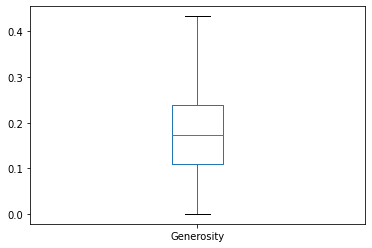

In [ ]:
df_2018['Generosity'].plot.box(whis=1.5)
# outliers replaced

In [ ]:
df_2018['Perceptions of corruption'].describe()
#represents ....
#type: float64
#One missing values

count    155.000000
mean       0.112000
std        0.096492
min        0.000000
25%        0.051000
50%        0.082000
75%        0.137000
max        0.457000
Name: Perceptions of corruption, dtype: float64

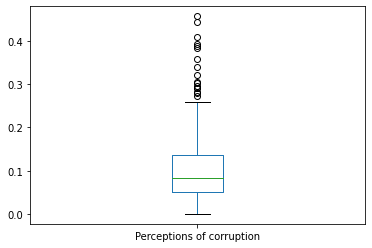

In [ ]:
df_2018['Perceptions of corruption'].plot.box(whis=1.5)
#LOTS OF OUTLIERS

In [ ]:
lower5, upper5 = check_outliers(df_2018['Perceptions of corruption'])
print(f'lower = {lower5}, upper={upper5}')

mask_upper5 = df_2018['Perceptions of corruption']>upper5
print(f'{mask_upper5.sum()} Upper outliers')
#upper outliers

mask_lower5 = df_2019['Perceptions of corruption']<lower5
print(f'{mask_lower5.sum()} Lower outliers')
#lower outliers

lower = -0.07800000000000004, upper=0.266
17 Upper outliers
0 Lower outliers


In [ ]:
df_2018['Population'].describe()
#represents population of each country in the thousands
#type: float64
# missing values = 156-134 = 22 missing

count    1.340000e+02
mean     4.896796e+04
std      1.716041e+05
min      3.370000e+02
25%      5.083750e+03
50%      1.132850e+04
75%      3.339625e+04
max      1.427648e+06
Name: Population, dtype: float64

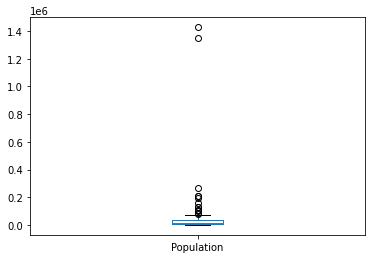

In [ ]:
df_2018['Population'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
#Find outliers
lower6, upper6 = check_outliers(df_2018['Population'])
print(f'lower = {lower6}, upper={upper6}')

mask_upper6 = df_2018['Population']>upper6
print(f'{mask_upper6.sum()} Upper outliers')
#14 upper outliers

mask_lower6 = df_2018['Population']<lower6
print(f'{mask_lower6.sum()} Lower outliers')
#no lower outliers

lower = -37385.0, upper=75865.0
14 Upper outliers
0 Lower outliers


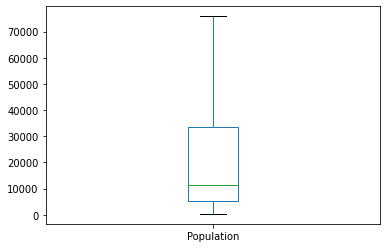

In [ ]:
#replace outliers
df_2018['Population']=df_2018['Population'] # Create duplicate column
for i in df_2018[mask_upper6].index: 
  df_2018.loc[i,'Population']=upper6  # replace upper outliers
for i in df_2018[mask_lower6].index:
  df_2018.loc[i,'Population']=lower6 # replace lower outliers

#check again
df_2018['Population'].plot.box(whis=1.5)
#outliers removed


In [ ]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Population                    134 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 13.4+ KB


In [ ]:
df_2019['Overall rank'].describe()
#represents rank of each countries happiness
#Type: Float64
#% Missing Values: 0

count    156.000000
mean      78.500000
std       45.177428
min        1.000000
25%       39.750000
50%       78.500000
75%      117.250000
max      156.000000
Name: Overall rank, dtype: float64

In [ ]:
df_2019['Country or region'].describe()
#represents name of each country
#Type: Object
#% Missing Values: 0

count       156
unique      156
top       Ghana
freq          1
Name: Country or region, dtype: object

In [ ]:
df_2019['Score'].describe()
#represents happiness score of each country
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

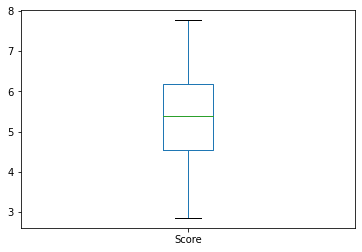

In [ ]:
df_2019['Score'].plot.box(whis=1.5)
#NO OUTLIERS

In [ ]:
df_2019['GDP per capita'].describe()
#represents ...
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64

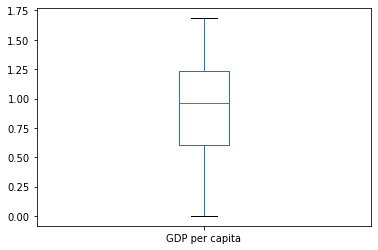

In [ ]:
df_2019['GDP per capita'].plot.box(whis=1.5)
#NO OUTLIERS

In [ ]:
df_2019['Social support'].describe()
#represents ...
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       1.208814
std        0.299191
min        0.000000
25%        1.055750
50%        1.271500
75%        1.452500
max        1.624000
Name: Social support, dtype: float64

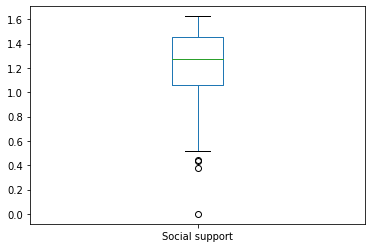

In [ ]:
df_2019['Social support'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower7, upper7 = check_outliers(df_2019['Social support'])
print(f'lower = {lower7}, upper={upper7}')

lower = 0.46062500000000006, upper=2.047625


In [ ]:
mask_upper7 = df_2018['Social support']>upper7
mask_upper7.sum()
#no upper outliers

0

In [ ]:
mask_lower7 = df_2019['Social support']<lower7
mask_lower7.sum()
#lower outliers

4

In [ ]:
df_2019['Social support']=df_2019['Social support']
for i in df_2019[mask_lower7].index:
  df_2019.loc[i,'Social support']=lower7 # replace outliers

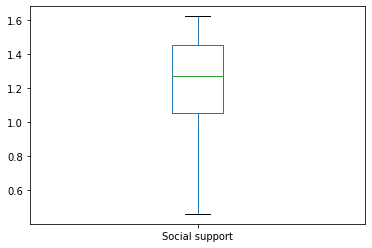

In [ ]:
df_2019['Social support'].plot.box(whis=1.5)
#outliers removed

In [ ]:
df_2019['Healthy life expectancy'].describe()
#represents ...
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       0.725244
std        0.242124
min        0.000000
25%        0.547750
50%        0.789000
75%        0.881750
max        1.141000
Name: Healthy life expectancy, dtype: float64

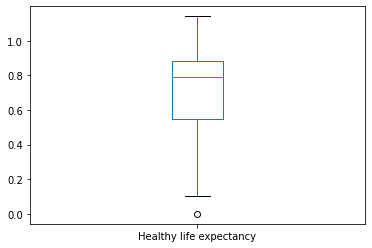

In [ ]:
df_2019['Healthy life expectancy'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower8, upper8 = check_outliers(df_2019['Healthy life expectancy'])
print(f'lower = {lower8}, upper={upper8}')

lower = 0.04675000000000007, upper=1.3827499999999997


In [ ]:
mask_upper8 = df_2019['Healthy life expectancy']>upper8
mask_upper8.sum()
#no upper outliers

0

In [ ]:
mask_lower8 = df_2019['Healthy life expectancy']<lower8
mask_lower8.sum()
#lower outliers

1

In [ ]:
df_2019['Healthy life expectancy']=df_2019['Healthy life expectancy']
for i in df_2019[mask_lower8].index:
  df_2019.loc[i,'Healthy life expectancy']=lower8

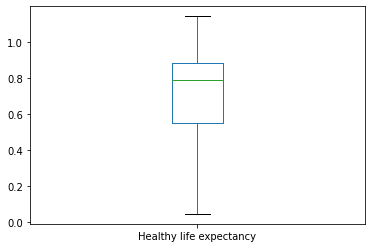

In [ ]:
df_2019['Healthy life expectancy'].plot.box(whis=1.5)
#outliers removed

In [ ]:
df_2019['Agency'] = df_2019['Freedom to make life choices'] #renaming 
df_2019 = df_2019.drop(labels=['Freedom to make life choices'], axis=1) # drop duplicate
df_2019['Agency'].describe()
#represents ...
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       0.392571
std        0.143289
min        0.000000
25%        0.308000
50%        0.417000
75%        0.507250
max        0.631000
Name: Agency, dtype: float64

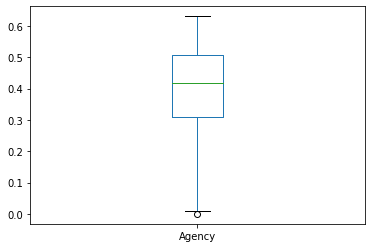

In [ ]:
df_2019['Agency'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower9, upper9 = check_outliers(df_2019['Agency'])
print(f'lower = {lower9}, upper={upper9}')

lower = 0.009124999999999994, upper=0.806125


In [ ]:
mask_upper9 = df_2019['Agency']>upper9
mask_upper9.sum()
#no upper outliers

0

In [ ]:
mask_lower9 = df_2019['Agency']<lower9
mask_lower9.sum()
#lower outliers

1

In [ ]:
df_2019['Agency']=df_2019['Agency']
for i in df_2019[mask_lower9].index:
  df_2019.loc[i,'Agency']=lower9 # replace outliers

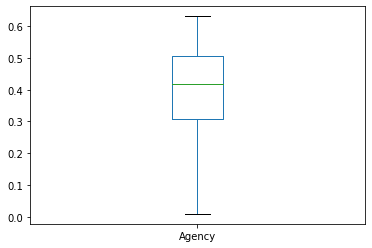

In [ ]:
df_2019['Agency'].plot.box(whis=1.5)
#OUTLIERS removed

In [ ]:
df_2019['Generosity'].describe()
#represents ...
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       0.184846
std        0.095254
min        0.000000
25%        0.108750
50%        0.177500
75%        0.248250
max        0.566000
Name: Generosity, dtype: float64

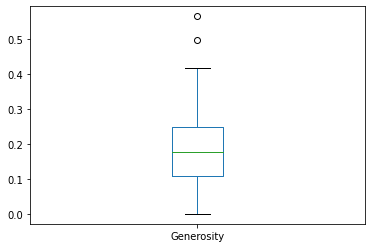

In [ ]:
df_2019['Generosity'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower10, upper10 = check_outliers(df_2019['Generosity'])
print(f'lower = {lower10}, upper={upper10}')

lower = -0.10049999999999998, upper=0.4575


In [ ]:
mask_upper10 = df_2019['Generosity']>upper10
mask_upper10.sum()
#upper outliers

2

In [ ]:
mask_lower10 = df_2019['Generosity']<lower10
mask_lower10.sum()
#no lower outliers

0

In [ ]:
df_2019['Generosity']=df_2019['Generosity']
for i in df_2019[mask_upper10].index:
  df_2019.loc[i,'Generosity']=upper10

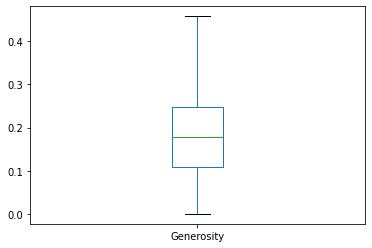

In [ ]:
df_2019['Generosity'].plot.box(whis=1.5)
#Outliers removed

In [ ]:
df_2019['Perceptions of corruption'].describe()
#represents ...
#Type: Float64
#% Missing Values: 0

count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Perceptions of corruption, dtype: float64

lower = -0.09437499999999997, upper=0.28262499999999996
14 Upper outliers
0 Lower outliers


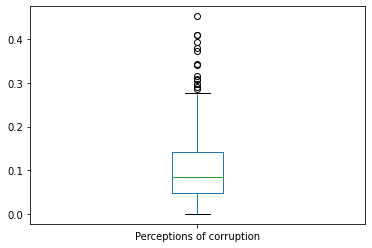

In [ ]:
df_2019['Perceptions of corruption'].plot.box(whis=1.5)
#Many upper Outliers


mask_upper11 = df_2019['Perceptions of corruption']>upper10
mask_upper11.sum()

mask_lower11 = df_2019['Perceptions of corruption']<lower10
mask_lower11.sum()

lower11, upper11 = check_outliers(df_2019['Perceptions of corruption'])
print(f'lower = {lower11}, upper={upper11}')

mask_upper11 = df_2019['Perceptions of corruption']>upper11
print(f'{mask_upper11.sum()} Upper outliers')
#14 upper outliers

mask_lower11 = df_2019['Perceptions of corruption']<lower11
print(f'{mask_lower11.sum()} Lower outliers')
#no lower outliers

In [ ]:
df_2019['Population'].describe()
#represents population of each country in the thousands
#type: float64
# missing values = 156-134 = 22 missing

count    1.340000e+02
mean     4.898463e+04
std      1.729597e+05
min      3.390000e+02
25%      4.895750e+03
50%      1.116250e+04
75%      3.286400e+04
max      1.433784e+06
Name: Population, dtype: float64

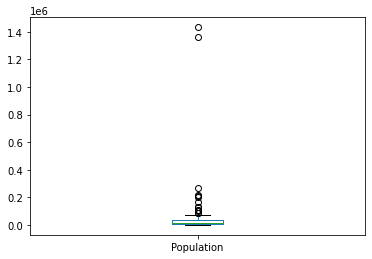

In [ ]:
df_2019['Population'].plot.box(whis=1.5)
#OUTLIERS

In [ ]:
lower12, upper12 = check_outliers(df_2019['Population'])
print(f'lower = {lower12}, upper={upper12}')

mask_upper12 = df_2019['Population']>upper12
print(f'{mask_upper12.sum()} Upper outliers')
#14 upper outliers

mask_lower12 = df_2019['Population']<lower12
print(f'{mask_lower12.sum()} Lower outliers')
#no lower outliers

lower = -37056.625, upper=74816.375
14 Upper outliers
0 Lower outliers


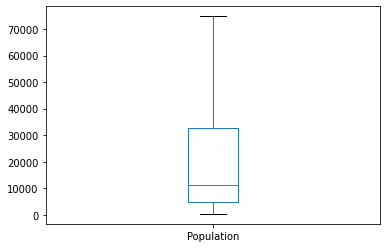

In [ ]:
df_2019['Population']=df_2019['Population'] # Create duplicate column
for i in df_2019[mask_upper12].index: 
  df_2019.loc[i,'Population']=upper12  # replace upper outliers
for i in df_2019[mask_lower12].index:
  df_2019.loc[i,'Population']=lower12 # replace lower outliers

df_2019['Population'].plot.box(whis=1.5)
#Outliers removed

Creat Bins for Score

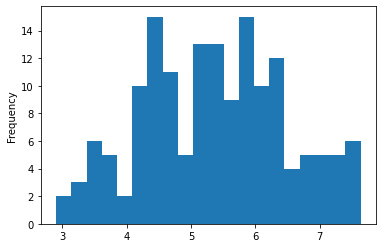

In [ ]:
#Binning by width here
df_2018['Score'].plot.hist(bins=20)
# groups from 3-4, 4-5, 5-6.5, 6.5-7.5

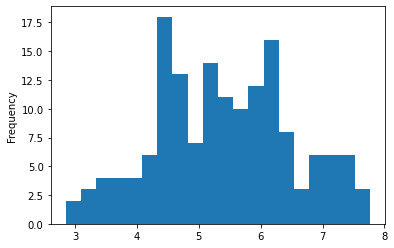

In [ ]:
df_2019['Score'].plot.hist(bins=20)

In [ ]:
df = pd.merge(df_2018, df_2019[['Country or region','Score','GDP per capita','Social support','Healthy life expectancy','Agency', 'Generosity','Perceptions of corruption', 'Population']], left_on='Country or region',right_on='Country or region',how='left') #merge columns
df = df.drop(['Overall rank', 'Country or region'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Score_x                      156 non-null    float64
 1   GDP per capita_x             156 non-null    float64
 2   Social support_x             156 non-null    float64
 3   Healthy life expectancy_x    156 non-null    float64
 4   Generosity_x                 156 non-null    float64
 5   Perceptions of corruption_x  155 non-null    float64
 6   Population_x                 134 non-null    float64
 7   Agency_x                     156 non-null    float64
 8   Score_y                      152 non-null    float64
 9   GDP per capita_y             152 non-null    float64
 10  Social support_y             152 non-null    float64
 11  Healthy life expectancy_y    152 non-null    float64
 12  Agency_y                     152 non-null    float64
 13  Generosity_y        

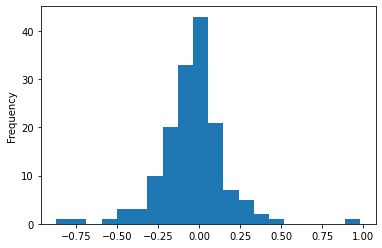

In [ ]:
df['∆Score'] = df['Score_x']-df['Score_y']
df['∆Score'].plot.hist(bins=20)

In [ ]:
df_2018['Score_bin'] = pd.qcut(df_2018['Score'],4) # equal frequency bins
df_2018['Score_bin'].describe()

count                156
unique                 4
top       (6.168, 7.632]
freq                  39
Name: Score_bin, dtype: object

In [ ]:
df_2019['Score_bin'] = pd.qcut(df_2019['Score'],4) # equal frequency bins
df_2019['Score_bin'].describe()

count                156
unique                 4
top       (6.184, 7.769]
freq                  39
Name: Score_bin, dtype: object

Fill missing values for Population

In [ ]:
df_2018['smooth_pop_bin_mean']=df_2018.groupby('Score_bin')['Population'].transform(replace_with_bin_mean) # find mean of each bin
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Population,Agency,Score_bin,smooth_pop_bin_mean
0,1,Finland,7.632,1.305,1.592,0.874,0.202,0.393,5523.0,0.681,"(6.168, 7.632]",22621.171429
1,2,Norway,7.594,1.456,1.582,0.861,0.286,0.340,5338.0,0.686,"(6.168, 7.632]",22621.171429
2,3,Denmark,7.555,1.351,1.590,0.868,0.284,0.408,5752.0,0.683,"(6.168, 7.632]",22621.171429
3,4,Iceland,7.495,1.343,1.644,0.914,0.353,0.138,337.0,0.677,"(6.168, 7.632]",22621.171429
4,5,Switzerland,7.487,1.420,1.549,0.927,0.256,0.357,8526.0,0.660,"(6.168, 7.632]",22621.171429


In [ ]:
mask_NullPop = pd.isnull(df_2018['Population'])
#mask_NullPop.sum()
df_2018[mask_NullPop] #show rows with null population, so they can be filled in 

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Population,Agency,Score_bin,smooth_pop_bin_mean
17,18,United States,6.886,1.398,1.471000,0.819,0.291,0.133,NaN,0.547,"(6.168, 7.632]",22621.171429
20,21,Czech Republic,6.711,1.233,1.489000,0.854,0.064,0.034,NaN,0.543,"(6.168, 7.632]",22621.171429
25,26,Taiwan,6.441,1.365,1.436000,0.857,0.151,0.078,NaN,0.418,"(6.168, 7.632]",22621.171429
37,38,Trinidad & Tobago,6.192,1.223,1.492000,0.564,0.171,0.019,NaN,0.575,"(6.168, 7.632]",22621.171429
56,57,South Korea,5.875,1.266,1.204000,0.955,0.175,0.051,NaN,0.244,"(5.378, 6.168]",21581.343750
57,58,Northern Cyprus,5.835,1.229,1.211000,0.909,0.179,0.154,NaN,0.495,"(5.378, 6.168]",21581.343750
58,59,Russia,5.810,1.151,1.479000,0.599,0.065,0.025,NaN,0.399,"(5.378, 6.168]",21581.343750
61,62,Bolivia,5.752,0.751,1.223000,0.508,0.141,0.054,NaN,0.606,"(5.378, 6.168]",21581.343750
65,66,Kosovo,5.662,0.855,1.230000,0.578,0.274,0.023,NaN,0.448,"(5.378, 6.168]",21581.343750
66,67,Moldova,5.640,0.657,1.301000,0.620,0.171,0.000,NaN,0.232,"(5.378, 6.168]",21581.343750


In [ ]:
for i in df_2018[mask_NullPop].index:
  df_2018.loc[i,'Population']=df_2018.loc[i,'smooth_pop_bin_mean'] # replace null population with bin mean
df_2018['Population'].describe() # confirm the missing values filled

count      156.000000
mean     22838.778660
std      22267.672683
min        337.000000
25%       5827.750000
50%      17072.000000
75%      29563.750000
max      75865.000000
Name: Population, dtype: float64

In [ ]:
df_2019['smooth_pop_bin_mean']=df_2019.groupby('Score_bin')['Population'].transform(replace_with_bin_mean) # find mean of each bin
df_2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Population,Agency,Score_bin,smooth_pop_bin_mean
151,152,Rwanda,3.334,0.359,0.711000,0.614,0.217,0.411,12627.0,0.555000,"(2.8520000000000003, 4.544]",25106.814286
152,153,Tanzania,3.231,0.476,0.885000,0.499,0.276,0.147,NaN,0.417000,"(2.8520000000000003, 4.544]",25106.814286
153,154,Afghanistan,3.203,0.350,0.517000,0.361,0.158,0.025,38042.0,0.009125,"(2.8520000000000003, 4.544]",25106.814286
154,155,Central African Republic,3.083,0.026,0.460625,0.105,0.235,0.035,4745.0,0.225000,"(2.8520000000000003, 4.544]",25106.814286
155,156,South Sudan,2.853,0.306,0.575000,0.295,0.202,0.091,11062.0,0.010000,"(2.8520000000000003, 4.544]",25106.814286


In [ ]:
mask_NullPop = pd.isnull(df_2019['Population'])
#mask_NullPop.sum()
df_2019[mask_NullPop] #show rows with null population

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,Population,Agency,Score_bin,smooth_pop_bin_mean
18,19,United States,6.892,1.433,1.457000,0.87400,0.280,0.128,NaN,0.454,"(6.184, 7.769]",21000.203571
19,20,Czech Republic,6.852,1.269,1.487000,0.92000,0.046,0.036,NaN,0.457,"(6.184, 7.769]",21000.203571
24,25,Taiwan,6.446,1.368,1.430000,0.91400,0.242,0.097,NaN,0.351,"(6.184, 7.769]",21000.203571
38,39,Trinidad & Tobago,6.192,1.231,1.477000,0.71300,0.185,0.016,NaN,0.489,"(6.184, 7.769]",21000.203571
45,46,Kosovo,6.100,0.882,1.232000,0.75800,0.262,0.006,NaN,0.489,"(5.38, 6.184]",20389.910156
53,54,South Korea,5.895,1.301,1.219000,1.03600,0.175,0.056,NaN,0.159,"(5.38, 6.184]",20389.910156
60,61,Bolivia,5.779,0.776,1.209000,0.70600,0.137,0.064,NaN,0.511,"(5.38, 6.184]",20389.910156
63,64,Northern Cyprus,5.718,1.263,1.252000,1.04200,0.191,0.162,NaN,0.417,"(5.38, 6.184]",20389.910156
67,68,Russia,5.648,1.183,1.452000,0.72600,0.082,0.031,NaN,0.334,"(5.38, 6.184]",20389.910156
70,71,Moldova,5.529,0.685,1.328000,0.73900,0.181,0.000,NaN,0.245,"(5.38, 6.184]",20389.910156


In [ ]:
for i in df_2019[mask_NullPop].index:
  df_2019.loc[i,'Population']=df_2019.loc[i,'smooth_pop_bin_mean'] # replace null population with bin mean
df_2019['Population'].describe() # confirm the missing values filled

count      156.000000
mean     22411.165597
std      22154.165889
min        339.000000
25%       5712.000000
50%      16391.500000
75%      28747.250000
max      74816.375000
Name: Population, dtype: float64

Fill missing value in 2018 'Perception of Corruption' **column**

In [ ]:
df_2018['Perceptions of corruption'].fillna(df_2018['Perceptions of corruption'].mean(),inplace = True)


Feature Selection

In [ ]:
df['class']=np.where(df['∆Score']>0, 1,0)
Y = df.iloc[:,17:18]
Y.head()

,class
0,0
1,1
2,0
3,1
4,1


In [ ]:
Happiness_C={}
Happiness_C['feature_names']= df.columns.values
Happiness_C['data']=df.values
Happiness_C['target_names']=Y['class'].unique()
Happiness_C['target']=Y['class'].values

In [ ]:
df['Score_18 bin']= pd.qcut(df['Score_x'],4)
df['GDP_18 bin']= pd.qcut(df['GDP per capita_x'],4)
df['Social_18 bin']= pd.qcut(df['Social support_x'],4)
df['Health_18 bin']=pd.qcut(df['Healthy life expectancy_x'],4)
df['Agency_18 bin']=pd.qcut(df['Agency_x'],4)
df['Generosity_18 bin']= pd.qcut(df['Generosity_x'],4)
df['Corruption_18 bin']= pd.qcut(df['Perceptions of corruption_x'],4)
df['Population_18 bin']= pd.qcut(df['Population_x'],4)

df['Score_19 bin']= pd.qcut(df['Score_y'],4)
df['GDP_19 bin']= pd.qcut(df['GDP per capita_y'],4)
df['Social_19 bin']= pd.qcut(df['Social support_y'],4)
df['Health_19 bin']=pd.qcut(df['Healthy life expectancy_y'],4)
df['Agency_19 bin']=pd.qcut(df['Agency_y'],4)
df['Generosity_19 bin']= pd.qcut(df['Generosity_y'],4)
df['Corruption_19 bin']= pd.qcut(df['Perceptions of corruption_y'],4)
df['Population_19 bin']= pd.qcut(df['Population_y'],4)

In [ ]:
df = df.drop(['GDP per capita_x','Social support_x','Healthy life expectancy_x','Agency_x','Generosity_x','Perceptions of corruption_x',
              'Population_x', 'GDP per capita_y','Social support_y','Healthy life expectancy_y','Agency_y','Generosity_y','Perceptions of corruption_y',
              'Population_y'],axis=1)

In [ ]:
df.head()

,Score_x,Score_y,∆Score,class,Score_18 bin,GDP_18 bin,Social_18 bin,Health_18 bin,Agency_18 bin,Generosity_18 bin,Corruption_18 bin,Population_18 bin,Score_19 bin,GDP_19 bin,Social_19 bin,Health_19 bin,Agency_19 bin,Generosity_19 bin,Corruption_19 bin,Population_19 bin
0,7.632,7.769,-0.137,0,"(6.168, 7.632]","(1.198, 2.07]","(1.463, 1.644]","(0.777, 1.03]","(0.578, 0.724]","(0.174, 0.239]","(0.137, 0.457]","(5083.75, 11328.5]","(6.194, 7.769]","(1.237, 1.684]","(1.454, 1.624]","(0.886, 1.141]","(0.508, 0.631]","(0.109, 0.177]","(0.141, 0.453]","(5213.5, 11531.0]"
1,7.594,7.554,0.040,1,"(6.168, 7.632]","(1.198, 2.07]","(1.463, 1.644]","(0.777, 1.03]","(0.578, 0.724]","(0.239, 0.433]","(0.137, 0.457]","(5083.75, 11328.5]","(6.194, 7.769]","(1.237, 1.684]","(1.454, 1.624]","(0.886, 1.141]","(0.508, 0.631]","(0.246, 0.458]","(0.141, 0.453]","(5213.5, 11531.0]"
2,7.555,7.600,-0.045,0,"(6.168, 7.632]","(1.198, 2.07]","(1.463, 1.644]","(0.777, 1.03]","(0.578, 0.724]","(0.239, 0.433]","(0.137, 0.457]","(5083.75, 11328.5]","(6.194, 7.769]","(1.237, 1.684]","(1.454, 1.624]","(0.886, 1.141]","(0.508, 0.631]","(0.246, 0.458]","(0.141, 0.453]","(5213.5, 11531.0]"
3,7.495,7.494,0.001,1,"(6.168, 7.632]","(1.198, 2.07]","(1.463, 1.644]","(0.777, 1.03]","(0.578, 0.724]","(0.239, 0.433]","(0.137, 0.457]","(336.999, 5083.75]","(6.194, 7.769]","(1.237, 1.684]","(1.454, 1.624]","(0.886, 1.141]","(0.508, 0.631]","(0.246, 0.458]","(0.0855, 0.141]","(338.999, 5213.5]"
4,7.487,7.480,0.007,1,"(6.168, 7.632]","(1.198, 2.07]","(1.463, 1.644]","(0.777, 1.03]","(0.578, 0.724]","(0.239, 0.433]","(0.137, 0.457]","(5083.75, 11328.5]","(6.194, 7.769]","(1.237, 1.684]","(1.454, 1.624]","(0.886, 1.141]","(0.508, 0.631]","(0.246, 0.458]","(0.141, 0.453]","(5213.5, 11531.0]"


In [ ]:
df['Population_19 bin'].unique()

[(5213.5, 11531.0], (338.999, 5213.5], (11531.0, 33625.5], (33625.5, 74816.375], NaN]
Categories (4, interval[float64]): [(338.999, 5213.5] < (5213.5, 11531.0] < (11531.0, 33625.5] <
                                    (33625.5, 74816.375]]

In [ ]:
le = LabelEncoder()
labels={}
df['Score_18 bin']=le.fit_transform(df['Score_18 bin'])
labels['Score_18 bin']=le.classes_
df['GDP_18 bin']=le.fit_transform(df['GDP_18 bin'])
labels['GDP_18 bin']=le.classes_
df['Social_18 bin']=le.fit_transform(df['Social_18 bin'])
labels['Social_18 bin']=le.classes_
df['Health_18 bin']=le.fit_transform(df['Health_18 bin'])
labels['Health_18 bin']=le.classes_
df['Agency_18 bin']=le.fit_transform(df['Agency_18 bin'])
labels['Agency_18 bin']=le.classes_
df['Generosity_18 bin']=le.fit_transform(df['Generosity_18 bin'])
labels['Generosity_18 bin']=le.classes_
df['Corruption_18 bin']=le.fit_transform(df['Corruption_18 bin'].astype(str))
labels['Corruption_18 bin']=le.classes_
df['Population_18 bin']=le.fit_transform(df['Population_18 bin'].astype(str))
labels['Population_18 bin']=le.classes_
df['Score_19 bin']=le.fit_transform(df['Score_19 bin'].astype(str))
labels['Score_19 bin']=le.classes_
df['GDP_19 bin']=le.fit_transform(df['GDP_19 bin'].astype(str))
labels['GDP_19 bin']=le.classes_
df['Social_19 bin']=le.fit_transform(df['Social_19 bin'].astype(str))
labels['Social_19 bin']=le.classes_
df['Health_19 bin']=le.fit_transform(df['Health_19 bin'].astype(str))
labels['Health_19 bin']=le.classes_
df['Agency_19 bin']=le.fit_transform(df['Agency_19 bin'].astype(str))
labels['Agency_19 bin']=le.classes_
df['Generosity_19 bin']=le.fit_transform(df['Generosity_19 bin'].astype(str))
labels['Generosity_19 bin']=le.classes_
df['Corruption_19 bin']=le.fit_transform(df['Corruption_19 bin'].astype(str))
labels['Corruption_19 bin']=le.classes_
df['Population_19 bin']=le.fit_transform(df['Population_19 bin'].astype(str))
labels['Population_19 bin']=le.classes_
df.head()

,Score_x,Score_y,∆Score,class,Score_18 bin,GDP_18 bin,Social_18 bin,Health_18 bin,Agency_18 bin,Generosity_18 bin,Corruption_18 bin,Population_18 bin,Score_19 bin,GDP_19 bin,Social_19 bin,Health_19 bin,Agency_19 bin,Generosity_19 bin,Corruption_19 bin,Population_19 bin
0,7.632,7.769,-0.137,0,3,3,3,3,3,2,3,3,3,3,3,3,3,1,3,3
1,7.594,7.554,0.040,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,7.555,7.600,-0.045,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,7.495,7.494,0.001,1,3,3,3,3,3,3,3,2,3,3,3,3,3,3,2,2
4,7.487,7.480,0.007,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Score_x            156 non-null    float64
 1   Score_y            152 non-null    float64
 2   ∆Score             152 non-null    float64
 3   class              156 non-null    int64  
 4   Score_18 bin       156 non-null    int64  
 5   GDP_18 bin         156 non-null    int64  
 6   Social_18 bin      156 non-null    int64  
 7   Health_18 bin      156 non-null    int64  
 8   Agency_18 bin      156 non-null    int64  
 9   Generosity_18 bin  156 non-null    int64  
 10  Corruption_18 bin  156 non-null    int64  
 11  Population_18 bin  156 non-null    int64  
 12  Score_19 bin       156 non-null    int64  
 13  GDP_19 bin         156 non-null    int64  
 14  Social_19 bin      156 non-null    int64  
 15  Health_19 bin      156 non-null    int64  
 16  Agency_19 bin      156 non

In [ ]:
df['Score_18 bin']=df['Score_18 bin'].astype('category')
df['GDP_18 bin']=df['GDP_18 bin'].astype('category')
df['Social_18 bin']= df['Social_18 bin'].astype('category')
df['Health_18 bin']=df['Health_18 bin'].astype('category')
df['Agency_18 bin']=df['Agency_18 bin'].astype('category')
df['Generosity_18 bin']= df['Generosity_18 bin'].astype('category')
df['Corruption_18 bin']= df['Corruption_18 bin'].astype('category')
df['Population_18 bin']= df['Population_18 bin'].astype('category')

df['Score_19 bin']= df['Score_19 bin'].astype('category')
df['GDP_19 bin']= df['GDP_19 bin'].astype('category')
df['Social_19 bin']= df['Social_19 bin'].astype('category')
df['Health_19 bin']=df['Health_19 bin'].astype('category')
df['Agency_19 bin']=df['Agency_19 bin'].astype('category')
df['Generosity_19 bin']= df['Generosity_19 bin'].astype('category')
df['Corruption_19 bin']= df['Corruption_19 bin'].astype('category')
df['Population_19 bin']= df['Population_19 bin'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Score_x            156 non-null    float64 
 1   Score_y            152 non-null    float64 
 2   ∆Score             152 non-null    float64 
 3   class              156 non-null    int64   
 4   Score_18 bin       156 non-null    category
 5   GDP_18 bin         156 non-null    category
 6   Social_18 bin      156 non-null    category
 7   Health_18 bin      156 non-null    category
 8   Agency_18 bin      156 non-null    category
 9   Generosity_18 bin  156 non-null    category
 10  Corruption_18 bin  156 non-null    category
 11  Population_18 bin  156 non-null    category
 12  Score_19 bin       156 non-null    category
 13  GDP_19 bin         156 non-null    category
 14  Social_19 bin      156 non-null    category
 15  Health_19 bin      156 non-null    category
 16  Agency_1

In [ ]:
df_Binary = df
df_Binary = df_Binary.drop(['Score_x', 'Score_y', '∆Score', 'class','Score_18 bin', 'Score_19 bin'],axis=1)
df_Binary = pd.get_dummies(df_Binary)
df_Binary.head()

,GDP_18 bin_0,GDP_18 bin_1,GDP_18 bin_2,GDP_18 bin_3,Social_18 bin_0,Social_18 bin_1,Social_18 bin_2,Social_18 bin_3,Health_18 bin_0,Health_18 bin_1,Health_18 bin_2,Health_18 bin_3,Agency_18 bin_0,Agency_18 bin_1,Agency_18 bin_2,Agency_18 bin_3,Generosity_18 bin_0,Generosity_18 bin_1,Generosity_18 bin_2,Generosity_18 bin_3,Corruption_18 bin_0,Corruption_18 bin_1,Corruption_18 bin_2,Corruption_18 bin_3,Corruption_18 bin_4,Population_18 bin_0,Population_18 bin_1,Population_18 bin_2,Population_18 bin_3,Population_18 bin_4,GDP_19 bin_0,GDP_19 bin_1,GDP_19 bin_2,GDP_19 bin_3,GDP_19 bin_4,Social_19 bin_0,Social_19 bin_1,Social_19 bin_2,Social_19 bin_3,Social_19 bin_4,Health_19 bin_0,Health_19 bin_1,Health_19 bin_2,Health_19 bin_3,Health_19 bin_4,Agency_19 bin_0,Agency_19 bin_1,Agency_19 bin_2,Agency_19 bin_3,Agency_19 bin_4,Generosity_19 bin_0,Generosity_19 bin_1,Generosity_19 bin_2,Generosity_19 bin_3,Generosity_19 bin_4,Corruption_19 bin_0,Corruption_19 bin_1,Corruption_19 bin_2,Corruption_19 bin_3,Corruption_19 bin_4,Population_19 bin_0,Population_19 bin_1,Population_19 bin_2,Population_19 bin_3,Population_19 bin_4
0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
Happiness_Binary={}
Happiness_Binary['feature_names']= df_Binary.columns.values
Happiness_Binary['n_features'] = len(df_Binary.columns.values)
Happiness_Binary['data']=df_Binary.values
Happiness_Binary['target_names']=Y['class'].unique()
Happiness_Binary['target']=Y['class'].values
Happiness_Binary['n_features']

65

Perform Chi-Square Feature Selection

In [ ]:
selector = SelectKBest(chi2,k=10)
Happiness_Binary['new_data_chi'] = selector.fit_transform(Happiness_Binary['data'], Happiness_Binary['target'])
mask = selector.get_support()
Happiness_Binary['new_feature_names_chi']=Happiness_Binary['feature_names'][mask]
Happiness_Binary['new_data_chi'].shape

(156, 10)

In [ ]:
Happiness_Binary['new_feature_names_chi'] #selected top 10 by performing chi2

array(['GDP_18 bin_2', 'Corruption_18 bin_0', 'Population_18 bin_1',
       'Population_18 bin_2', 'GDP_19 bin_2', 'Health_19 bin_4',
       'Agency_19 bin_4', 'Generosity_19 bin_4', 'Corruption_19 bin_4',
       'Population_19 bin_1'], dtype=object)

Naive Bayes classification on original binary dataset

In [ ]:
NB_M = MultinomialNB()
scores_old = cross_val_score(NB_M, Happiness_Binary['data'], Happiness_Binary['target'],cv=10, scoring='accuracy')
print(scores_old)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_old.mean(),scores_old.std()*2))

[0.5625     0.5625     0.6875     0.5        0.5        0.5625
 0.66666667 0.66666667 0.73333333 0.6       ]
Accuracy: 0.60 (+/- 0.15)


Naive Bayes classification on dataset with only 10 features

In [ ]:
scores_new_chi = cross_val_score(NB_M, Happiness_Binary['new_data_chi'], Happiness_Binary['target'],cv=10, scoring='accuracy')
print(scores_new_chi)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_new_chi.mean(),scores_new_chi.std()*2))

[0.625      0.6875     0.625      0.625      0.75       0.6875
 0.8        0.8        0.66666667 0.6       ]
Accuracy: 0.69 (+/- 0.14)


Try with 5, just to see if accuracy improves

In [ ]:
selector = SelectKBest(chi2,k=5)
Happiness_Binary['new_data_chi_5'] = selector.fit_transform(Happiness_Binary['data'], Happiness_Binary['target'])
mask = selector.get_support()
Happiness_Binary['new_feature_names_chi_5']=Happiness_Binary['feature_names'][mask]
Happiness_Binary['new_data_chi_5'].shape

(156, 5)

In [ ]:
scores_new_chi = cross_val_score(NB_M, Happiness_Binary['new_data_chi_5'], Happiness_Binary['target'],cv=10, scoring='accuracy')
print(scores_new_chi)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_new_chi.mean(),scores_new_chi.std()*2))

[0.5625     0.625      0.5        0.5        0.5625     0.5625
 0.66666667 0.73333333 0.66666667 0.66666667]
Accuracy: 0.60 (+/- 0.15)


Try with 15

In [ ]:
selector = SelectKBest(chi2,k=15)
Happiness_Binary['new_data_chi_15'] = selector.fit_transform(Happiness_Binary['data'], Happiness_Binary['target'])
mask = selector.get_support()
Happiness_Binary['new_feature_names_chi_15']=Happiness_Binary['feature_names'][mask]
Happiness_Binary['new_data_chi_15'].shape

(156, 15)

In [ ]:
scores_new_chi = cross_val_score(NB_M, Happiness_Binary['new_data_chi_15'], Happiness_Binary['target'],cv=10, scoring='accuracy')
print(scores_new_chi)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_new_chi.mean(),scores_new_chi.std()*2))

[0.625      0.6875     0.5625     0.5625     0.75       0.75
 0.73333333 0.8        0.66666667 0.6       ]
Accuracy: 0.67 (+/- 0.16)


Also tried with EF bins of 6 and 8. 4 bins gives highest accuracy

We are going to use k=10, since that has the largest increase in accuracy:

In [ ]:
Happiness_Binary['new_feature_names_chi'] #selected top 10 features by performing chi2

array(['GDP_18 bin_2', 'Corruption_18 bin_0', 'Population_18 bin_1',
       'Population_18 bin_2', 'GDP_19 bin_2', 'Health_19 bin_4',
       'Agency_19 bin_4', 'Generosity_19 bin_4', 'Corruption_19 bin_4',
       'Population_19 bin_1'], dtype=object)

In [ ]:
df_top_10 = df_Binary[['GDP_18 bin_2', 'Corruption_18 bin_0', 'Population_18 bin_1',
       'Population_18 bin_2', 'GDP_19 bin_2', 'Health_19 bin_2',
       'Agency_19 bin_4', 'Generosity_19 bin_4', 'Corruption_19 bin_4',
       'Population_19 bin_1']]

In [ ]:
df_top_10.head()

,GDP_18 bin_2,Corruption_18 bin_0,Population_18 bin_1,Population_18 bin_2,GDP_19 bin_2,Health_19 bin_2,Agency_19 bin_4,Generosity_19 bin_4,Corruption_19 bin_4,Population_19 bin_1
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_top_10.tail()

,GDP_18 bin_2,Corruption_18 bin_0,Population_18 bin_1,Population_18 bin_2,GDP_19 bin_2,Health_19 bin_2,Agency_19 bin_4,Generosity_19 bin_4,Corruption_19 bin_4,Population_19 bin_1
151,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0
153,0,0,0,0,0,0,0,0,0,0
154,0,1,0,1,0,0,0,0,0,0
155,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_top_10.describe()

,GDP_18 bin_2,Corruption_18 bin_0,Population_18 bin_1,Population_18 bin_2,GDP_19 bin_2,Health_19 bin_2,Agency_19 bin_4,Generosity_19 bin_4,Corruption_19 bin_4,Population_19 bin_1
count,156.000000,156.000000,156.000000,156.000000,156.00000,156.00000,156.000000,156.000000,156.000000,156.000000
mean,0.250000,0.256410,0.217949,0.217949,0.24359,0.24359,0.025641,0.025641,0.025641,0.211538
std,0.434407,0.438057,0.414182,0.414182,0.43063,0.43063,0.158571,0.158571,0.158571,0.409715
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   GDP_18 bin_2         156 non-null    uint8
 1   Corruption_18 bin_0  156 non-null    uint8
 2   Population_18 bin_1  156 non-null    uint8
 3   Population_18 bin_2  156 non-null    uint8
 4   GDP_19 bin_2         156 non-null    uint8
 5   Health_19 bin_2      156 non-null    uint8
 6   Agency_19 bin_4      156 non-null    uint8
 7   Generosity_19 bin_4  156 non-null    uint8
 8   Corruption_19 bin_4  156 non-null    uint8
 9   Population_19 bin_1  156 non-null    uint8
dtypes: uint8(10)
memory usage: 2.7 KB


In [ ]:
df_top_10['GDP_18 bin_2']= df_top_10['GDP_18 bin_2'].astype('category')
df_top_10['Corruption_18 bin_0']= df_top_10['Corruption_18 bin_0'].astype('category')
df_top_10['Population_18 bin_1']= df_top_10['Population_18 bin_1'].astype('category')
df_top_10['Population_18 bin_2']= df_top_10['Population_18 bin_2'].astype('category')
df_top_10['Health_19 bin_2']= df_top_10['Health_19 bin_2'].astype('category')
df_top_10['GDP_19 bin_2']= df_top_10['GDP_19 bin_2'].astype('category')
df_top_10['Agency_19 bin_4']=df_top_10['Agency_19 bin_4'].astype('category')
df_top_10['Generosity_19 bin_4']= df_top_10['Generosity_19 bin_4'].astype('category')
df_top_10['Corruption_19 bin_4']= df_top_10['Corruption_19 bin_4'].astype('category')
df_top_10['Population_19 bin_1']= df_top_10['Population_19 bin_1'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
df_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   GDP_18 bin_2         156 non-null    category
 1   Corruption_18 bin_0  156 non-null    category
 2   Population_18 bin_1  156 non-null    category
 3   Population_18 bin_2  156 non-null    category
 4   GDP_19 bin_2         156 non-null    category
 5   Health_19 bin_2      156 non-null    category
 6   Agency_19 bin_4      156 non-null    category
 7   Generosity_19 bin_4  156 non-null    category
 8   Corruption_19 bin_4  156 non-null    category
 9   Population_19 bin_1  156 non-null    category
dtypes: category(10)
memory usage: 3.7 KB


Assocation Rules

In [ ]:
freq_itemsets = apriori(df_top_10, min_support=0.10, use_colnames=True)
freq_itemsets #with support at 10%

,support,itemsets
0,0.25,(GDP_18 bin_2)
1,0.25641,(Corruption_18 bin_0)
2,0.217949,(Population_18 bin_1)
3,0.217949,(Population_18 bin_2)
4,0.24359,(GDP_19 bin_2)
5,0.24359,(Health_19 bin_2)
6,0.211538,(Population_19 bin_1)
7,0.230769,"(GDP_18 bin_2, GDP_19 bin_2)"
8,0.115385,"(GDP_18 bin_2, Health_19 bin_2)"
9,0.211538,"(Population_19 bin_1, Population_18 bin_1)"


In [ ]:
rules = association_rules(freq_itemsets, metric='confidence', 
                          min_threshold=0.10)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GDP_18 bin_2),(GDP_19 bin_2),0.250000,0.243590,0.230769,0.923077,3.789474,0.169872,9.833333
1,(GDP_19 bin_2),(GDP_18 bin_2),0.243590,0.250000,0.230769,0.947368,3.789474,0.169872,14.250000
2,(GDP_18 bin_2),(Health_19 bin_2),0.250000,0.243590,0.115385,0.461538,1.894737,0.054487,1.404762
3,(Health_19 bin_2),(GDP_18 bin_2),0.243590,0.250000,0.115385,0.473684,1.894737,0.054487,1.425000
4,(Population_19 bin_1),(Population_18 bin_1),0.211538,0.217949,0.211538,1.000000,4.588235,0.165434,inf


In [ ]:
rules.sort_values('support', ascending=False)
#print assosiation rules with the values sorted by support value
#to note: GDP appears very frequently,with a strong GDP->Heath anteceedent->consequent relationship throughout appearances

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GDP_18 bin_2),(GDP_19 bin_2),0.250000,0.243590,0.230769,0.923077,3.789474,0.169872,9.833333
1,(GDP_19 bin_2),(GDP_18 bin_2),0.243590,0.250000,0.230769,0.947368,3.789474,0.169872,14.250000
4,(Population_19 bin_1),(Population_18 bin_1),0.211538,0.217949,0.211538,1.000000,4.588235,0.165434,inf
5,(Population_18 bin_1),(Population_19 bin_1),0.217949,0.211538,0.211538,0.970588,4.588235,0.165434,26.807692
2,(GDP_18 bin_2),(Health_19 bin_2),0.250000,0.243590,0.115385,0.461538,1.894737,0.054487,1.404762
3,(Health_19 bin_2),(GDP_18 bin_2),0.243590,0.250000,0.115385,0.473684,1.894737,0.054487,1.425000
6,(Health_19 bin_2),(GDP_19 bin_2),0.243590,0.243590,0.108974,0.447368,1.836565,0.049638,1.368742
7,(GDP_19 bin_2),(Health_19 bin_2),0.243590,0.243590,0.108974,0.447368,1.836565,0.049638,1.368742
8,"(GDP_18 bin_2, Health_19 bin_2)",(GDP_19 bin_2),0.115385,0.243590,0.102564,0.888889,3.649123,0.074458,6.807692
9,"(GDP_18 bin_2, GDP_19 bin_2)",(Health_19 bin_2),0.230769,0.243590,0.102564,0.444444,1.824561,0.046351,1.361538


Adding Country/Region back in:

In [ ]:
df_top_10['Country or region'] = df_2018.iloc[:,1:2]
df_top_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   GDP_18 bin_2         156 non-null    category
 1   Corruption_18 bin_0  156 non-null    category
 2   Population_18 bin_1  156 non-null    category
 3   Population_18 bin_2  156 non-null    category
 4   GDP_19 bin_2         156 non-null    category
 5   Health_19 bin_2      156 non-null    category
 6   Agency_19 bin_4      156 non-null    category
 7   Generosity_19 bin_4  156 non-null    category
 8   Corruption_19 bin_4  156 non-null    category
 9   Population_19 bin_1  156 non-null    category
 10  Country or region    156 non-null    object  
dtypes: category(10), object(1)
memory usage: 4.9+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Decision Tree

In [ ]:
df_tree = df_top_10.drop('Country or region', axis=1)
df_tree['class']=np.where(df['∆Score']>0, 'Yes','No')
Y_tree = df_tree.iloc[:,10:11]
df_tree = df_tree.drop('class', axis=1)

In [ ]:
Tree = {}
Tree['Feature_names'] = df_tree.columns.values
Tree['Feature_data'] = df_tree.values
Tree['Target_names'] = Y_tree['class'].unique()
Tree['Target_data'] = Y_tree['class'].values
Tree

{'Feature_data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=object),
 'Feature_names': array(['GDP_18 bin_2', 'Corruption_18 bin_0', 'Population_18 bin_1',
        'Population_18 bin_2', 'GDP_19 bin_2', 'Health_19 bin_2',
        'Agency_19 bin_4', 'Generosity_19 bin_4', 'Corruption_19 bin_4',
        'Population_19 bin_1'], dtype=object),
 'Target_data': array(['No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes',
        'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
        'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
        'No', 'No', 'No', 

In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(Tree['Feature_data'],Tree['Target_data'],
                                                    test_size=0.3, random_state=1,
                                                    stratify = Tree['Target_data'])
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((109, 10), (109,), (47, 10), (47,))

In [ ]:
#testing different min_sample_leaf values, only leaving the one that generated the highest score active
# ---
#tree_entropy = DecisionTreeClassifier(criterion='entropy') #Score = 0.5319148936170213 (A = .62)
tree_entropy = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy') #Score = 0.6808510638297872 (A = .62)
#tree_entropy = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, criterion='entropy')#Score = 0.5957446808510638 (A = .64)
#tree_entropy = DecisionTreeClassifier(max_depth=3, min_samples_leaf=8, criterion='entropy') #Score = 0.6808510638297872 (A = .61)
#tree_entropy = DecisionTreeClassifier(max_depth=5, min_samples_leaf=8, criterion='entropy') #Score = 0.6808510638297872 (A = .60)
#tree_entropy = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12, criterion='entropy') #Score = 0.6808510638297872 (A = .62)
#tree_entropy = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, criterion='entropy') #Score = 0.6808510638297872 (A = .62)
tree_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

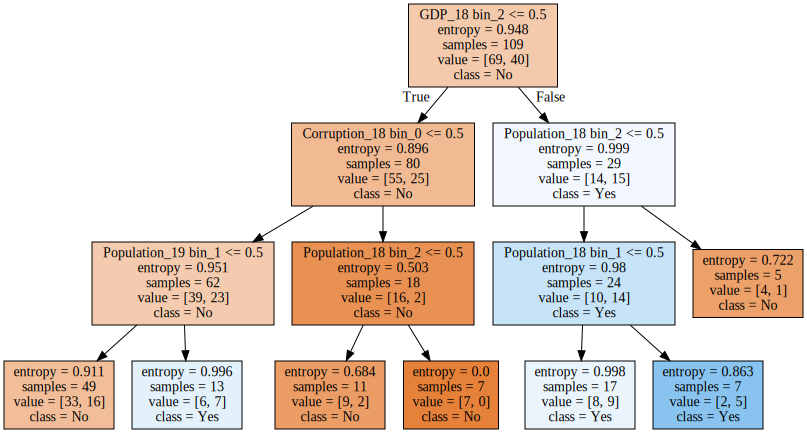

In [ ]:
#plotting the decision tree
dot_data = export_graphviz(tree_entropy, out_file = None,
                          feature_names = Tree['Feature_names'],
                          class_names = Tree['Target_names'],
                          filled=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
tree_entropy.score(X_test, Y_test)

0.6808510638297872

In [ ]:
tree_entropy.feature_importances_ 
        #Top features
        #1 = Population_18 bin_1
        #2 = Corruption_18 bin_0
        #3 = Population_18 bin_2
        #4 = GDP_18 bin_2
        #5 = Population_19 bin_1

array([0.23283573, 0.31262948, 0.04448196, 0.29079598, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11925685])

In [ ]:
entropy_scores = cross_val_score(tree_entropy, Tree['Feature_data'], Tree['Target_data'], cv=9, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (entropy_scores.mean(), entropy_scores.std() * 2))

Accuracy: 0.62 (+/- 0.11)


In [ ]:
y_predict= tree_entropy.predict(X_test)
y_predict_p = tree_entropy.predict_proba(X_test)
test_df = pd.DataFrame(X_test, columns=Tree['Feature_names'])
test_df['class']=Y_test
test_df['pre']=y_predict
test_df['error']=np.where(test_df['class']!=test_df['pre'],1,0)
p = pd.DataFrame(y_predict_p, index=test_df.index, columns = tree_entropy.classes_)

test_df=test_df.join(p)

for i in test_df.index:
    c = test_df.loc[i, 'pre']
    test_df.loc[i,'p_score']=test_df.loc[i,c]

test_df.head(10)

,GDP_18 bin_2,Corruption_18 bin_0,Population_18 bin_1,Population_18 bin_2,GDP_19 bin_2,Health_19 bin_2,Agency_19 bin_4,Generosity_19 bin_4,Corruption_19 bin_4,Population_19 bin_1,class,pre,error,No,Yes,p_score
0,0,1,1,0,0,0,0,0,0,1,No,No,0,0.818182,0.181818,0.818182
1,0,0,0,0,0,0,0,0,0,0,Yes,No,1,0.673469,0.326531,0.673469
2,0,0,0,0,0,0,0,0,0,0,No,No,0,0.673469,0.326531,0.673469
3,0,0,0,0,0,1,0,0,0,0,No,No,0,0.673469,0.326531,0.673469
4,0,1,0,0,0,1,0,0,0,0,No,No,0,0.818182,0.181818,0.818182
5,1,0,0,1,1,0,0,0,0,0,Yes,No,1,0.800000,0.200000,0.800000
6,0,1,1,0,0,0,0,0,0,1,Yes,No,1,0.818182,0.181818,0.818182
7,1,0,0,1,1,0,0,0,0,0,Yes,No,1,0.800000,0.200000,0.800000
8,0,0,0,1,0,0,0,0,0,0,No,No,0,0.673469,0.326531,0.673469
9,0,0,0,0,0,0,0,0,0,0,No,No,0,0.673469,0.326531,0.673469


Naive Bayes (don't need to re-fit test and train sets, done in last section)

In [ ]:
NB_B = BernoulliNB()
scores = cross_val_score(NB_B, Tree['Feature_data'], Tree['Target_data'], cv=5, scoring='accuracy')
scores

array([0.65625   , 0.70967742, 0.67741935, 0.67741935, 0.64516129])

In [ ]:
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.04)


In [ ]:
NB_M = MultinomialNB()
scores = cross_val_score(NB_M, Tree['Feature_data'], Tree['Target_data'], cv=5, scoring='accuracy')
scores

array([0.65625   , 0.67741935, 0.74193548, 0.70967742, 0.64516129])

In [ ]:
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.69 (+/- 0.07)


MultinomialNB shows a more accurate result, so we are going to go with that 

In [ ]:
y_predict = NB_M.fit(Tree['Feature_data'],Tree['Target_data']).predict(Tree['Feature_data'])

In [ ]:
df['NB prediction'] = y_predict
df['NB prediction'].replace(('Yes','No'),(1,0), inplace=True)
df['NB error']= np.where(df['class'] == df['NB prediction'], 0, 1)
df.head(50)

In [ ]:
confusion_matrix(Tree['Target_data'], y_predict)

In [ ]:
df['NB prediction'].describe()

Ensemble method: Random Forest Classification

In [ ]:
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy',
                             max_features = 'auto',
                             max_depth=None,
                             bootstrap=True,
                             random_state=10)

In [ ]:
scores_t = cross_val_score(rfc, Tree['Feature_data'], Tree['Target_data'], cv=10, scoring='accuracy')
print(scores_t)

In [ ]:
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_t.mean(), scores_t.std() * 2))

In [ ]:
bagging = BaggingClassifier(base_estimator= KNeighborsClassifier(),
                            n_estimators=10,
                            max_samples=0.5, max_features=0.5,
                            random_state=10)

In [ ]:
scores_b = cross_val_score(bagging, Tree['Feature_data'], Tree['Target_data'], cv=10, scoring='accuracy')
print(scores_b)

In [ ]:
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_b.mean(), scores_b.std() * 2))

In [ ]:
y_predict = bagging.fit(Tree['Feature_data'],Tree['Target_data']).predict(Tree['Feature_data'])
df['Bag prediction'] = y_predict
df['Bag prediction'].replace(('Yes','No'),(1,0), inplace=True)
df['Bag error']= np.where(df['class'] == df['Bag prediction'], 0, 1)
df.head(5)

In [ ]:
bagging.feature_importances_ 

NameError: ignored

Bagging is more accurate, so we are going to go with that 

Compare each model


In [ ]:
#Decision tree accuracy (mean of error)
print('Decision tree, mean= ',test_df['error'].mean() ,' std dev = ', test_df['error'].std())
#NB accuracy (mean of error)
print('Naive-Bayes, mean= ',df['NB error'].mean() ,' std dev = ', df['NB error'].std())
#Bagging accuracy (mean of error)
print('Bagging, mean= ',df['Bag error'].mean() ,' std dev = ', df['Bag error'].std())
